In [1]:
from scipy.io import netcdf
import numpy
from davitpy.pydarn.radar import *
from davitpy.pydarn.plotting import *
from davitpy.utils import *
import netCDF4
import cdf
%pylab inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot', 'pylab', 'figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
fName = "../data/sdr/f18/20141216/PS.APL_V0116S024CB0005_SC.U_DI.A_GP.F18-SSUSI_PA.APL-SDR-DISK_DD.20141216_SN.26612-00_DF.NC"

In [3]:
fh = netcdf.netcdf_file(fName, mmap=False)

lats = fh.variables['PIERCEPOINT_DAY_LATITUDE'].data
lons = fh.variables['PIERCEPOINT_DAY_LONGITUDE'].data
alts = fh.variables['PIERCEPOINT_DAY_ALTITUDE'].data

sc_lat = fh.variables['LATITUDE_DAY'].data.ravel()
sc_lon = fh.variables['LONGITUDE_DAY'].data.ravel()
sc_alt = fh.variables['ALTITUDE_DAY'].data.ravel()


In [4]:
for va in fh.variables.keys():
    if "TIME" in va:
        print va

DMSP_COORDS_TIME
TIME_EPOCH_DAY_AURORAL
TIME_EPOCH_DAY
TIME_EPOCH_NIGHT
PHOTOMETER_DMSP_TIME_OFFSET
TIME_DAY_AURORAL
TIME_NIGHT
TIME_PHOTOMETER
TIME_DAY


In [5]:
data1 = fh.variables['DISK_INTENSITY_DAY'].data[:, :, 2]
data2 = fh.variables['DISK_INTENSITY_DAY'].data[:, :, 3]
data3 = fh.variables['DISK_INTENSITY_DAY'].data[:, :, 4]

In [6]:
print data1.shape
print lats.shape
print fh.variables['TIME_DAY'].data.shape
# uselats = numpy.nanmin(lats, axis=0) > 45

(42, 1632)
(42, 1632)
(1632,)


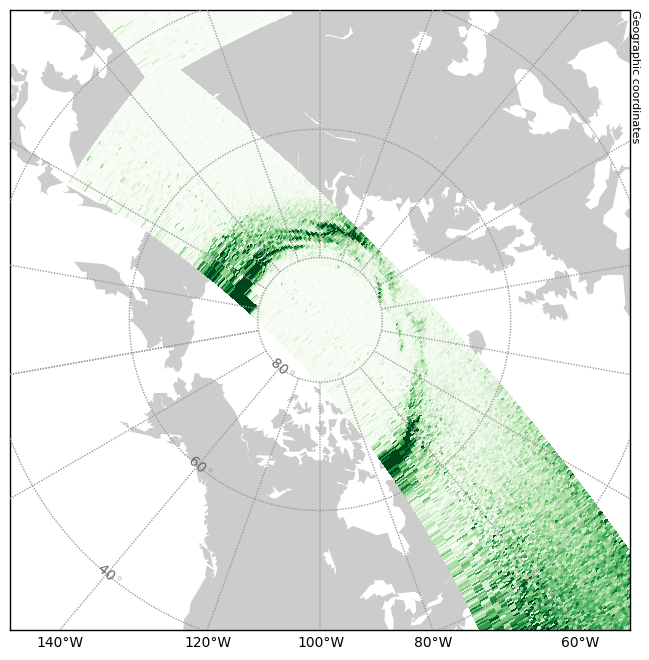

In [13]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = plotUtils.mapObj(boundinglat=40., coords='geo')

p = m.pcolormesh(lons, lats, data1, latlon=True, zorder=1.9,
                        vmin=0, vmax=1000,
                        ax=ax, alpha=1, cmap='Greens')

p.set_rasterized(True)

fig.savefig("../figs/ssusi-test.pdf",bbox_inches='tight')

In [8]:
x = fh.variables['TIME_EPOCH_DAY'].data[0]
print x, type( fh.variables['TIME_EPOCH_DAY'].data[0] )
print datetime.datetime.fromtimestamp(x/1e3).strftime('%c')
# print lats[:,0]
# print lons[:,0]

6.35859474413e+13 <type 'numpy.float64'>
Sun Dec 16 06:10:41 3984


In [9]:
dtVar = fh.variables['TIME_EPOCH_DAY'][:]
# dt2 = netCDF4.num2date(dtVar)

In [10]:
currDataSet = netCDF4.Dataset(fName)
epochList = currDataSet.variables["TIME_EPOCH_DAY"][:]
# account for difference in seconds between
                    # CDF epoch and python's epoch, leap year in there
                    # (datetime(1971,1,2) - 
                    #      datetime(1,1,1)).total_seconds()*1000
# epochList = epochList - 62167219200000
a = epochList[0]
print datetime.datetime.fromtimestamp(a/1e3)
sc_time = [datetime.datetime(2014, 12, 16) + datetime.timedelta(seconds=x) for x in fh.variables['TIME_DAY'].data.ravel()]
print sc_time[0]

3984-12-16 06:10:41.331001
2014-12-16 11:10:41.331119


In [11]:
# print currDataSet.STARTING_TIME, currDataSet.STOPPING_TIME
print (datetime.datetime(1971,1,2) - datetime.datetime(1,1,1)).total_seconds()*1000

6.21672192e+13


In [12]:
print cdf.internal.EPOCHbreakdown( epochList )

TypeError: only length-1 arrays can be converted to Python scalars